<a href="https://colab.research.google.com/github/Ayush310803/ViT/blob/main/Mask2former.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision opencv-python matplotlib
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-vd_smtbu
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-vd_smtbu
  Resolved https://github.com/facebookresearch/detectron2.git to commit 9604f5995cc628619f0e4fd913453b4d7d61db3f
  Preparing metadata (setup.py) ... done


In [2]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [3]:
cfg = get_cfg()

cfg.merge_from_file("detectron2/configs/COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml")
cfg.MODEL.WEIGHTS = "detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_50_3x/137849500/model_final_cafdb1.pkl"

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

predictor = DefaultPredictor(cfg)


AssertionError: Config file 'detectron2/configs/COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml' does not exist!

In [ ]:
from google.colab import files

uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
outputs = predictor(image)


In [ ]:
v = Visualizer(image_rgb, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
output_image = v.draw_panoptic_seg_predictions(outputs["panoptic_seg"][0].to("cpu"), outputs["panoptic_seg"][1])

plt.figure(figsize=(10, 10))
plt.imshow(output_image.get_image())
plt.axis("off")
plt.show()


`label_ids_to_fuse` unset. No instance will be fused.


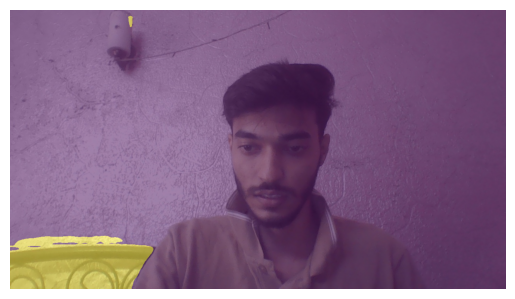

In [8]:
!pip install -q transformers timm matplotlib opencv-python

from transformers import Mask2FormerForUniversalSegmentation, AutoImageProcessor
import torch
import matplotlib.pyplot as plt
import cv2
import numpy as np

processor = AutoImageProcessor.from_pretrained("facebook/mask2former-swin-small-coco-instance")
model = Mask2FormerForUniversalSegmentation.from_pretrained("facebook/mask2former-swin-small-coco-instance")

url = "/content/WIN_20240515_15_50_50_Pro.jpg"
image = cv2.cvtColor(cv2.imread(url), cv2.COLOR_BGR2RGB)
inputs = processor(image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

processed_sizes = [(image.shape[0], image.shape[1])]
result = processor.post_process_panoptic_segmentation(outputs, threshold=0.5, target_sizes=processed_sizes)[0]

plt.imshow(image)
plt.imshow(result["segmentation"], alpha=0.5)
plt.axis('off')
plt.show()

/usr/local/lib/python3.11/dist-packages/transformers/utils/deprecation.py:165: UserWarning: The following named arguments are not valid for `Mask2FormerImageProcessor.__init__` and were ignored: '_max_size'
  return func(*args, **kwargs)
`label_ids_to_fuse` unset. No instance will be fused.


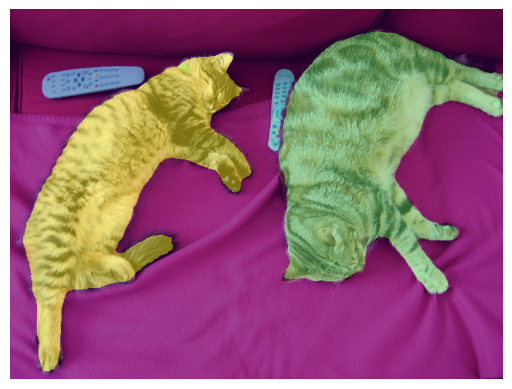

In [6]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from transformers import Mask2FormerForUniversalSegmentation, AutoImageProcessor

processor = AutoImageProcessor.from_pretrained("facebook/mask2former-swin-small-coco-instance")
model = Mask2FormerForUniversalSegmentation.from_pretrained("facebook/mask2former-swin-small-coco-instance")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"

import urllib.request
import numpy as np

req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
image = cv2.imdecode(arr, -1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
inputs = processor(image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

processed_sizes = [(image.shape[0], image.shape[1])]
result = processor.post_process_panoptic_segmentation(outputs, threshold=0.5, target_sizes=processed_sizes)[0]

plt.imshow(image)
plt.imshow(result["segmentation"], alpha=0.5)
plt.axis('off')
plt.show()

In [11]:
!pip install -q torch torchvision
!pip install -q 'git+https://github.com/facebookresearch/detectron2.git'
!pip install -q 'git+https://github.com/facebookresearch/Mask2Former.git'

!git clone https://github.com/facebookresearch/Mask2Former.git

!wget https://dl.fbaipublicfiles.com/maskformer/mask2former/coco/instance/maskformer2_swin_small_bs16_50ep/model_final_6e71f7.pkl

from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import cv2
import matplotlib.pyplot as plt

cfg = get_cfg()
cfg.merge_from_file("Mask2Former/configs/coco/instance-segmentation/swin/maskformer2_swin_small_bs16_50ep.yaml")  # Correct path
cfg.MODEL.WEIGHTS = "model_final_6e71f7.pkl"
cfg.MODEL.DEVICE = "cuda"

predictor = DefaultPredictor(cfg)
metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = cv2.imread(url)

outputs = predictor(image)

v = Visualizer(image[:, :, ::-1], metadata, scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image())
plt.axis('off')
plt.show()

  Preparing metadata (setup.py) ... done
ERROR: git+https://github.com/facebookresearch/Mask2Former.git does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
Cloning into 'Mask2Former'...
remote: Enumerating objects: 297, done.
remote: Counting objects: 100% (208/208), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 297 (delta 119), reused 113 (delta 113), pack-reused 89 (from 1)
Receiving objects: 100% (297/297), 405.11 KiB | 2.03 MiB/s, done.
Resolving deltas: 100% (135/135), done.
--2025-03-13 11:35:26--  https://dl.fbaipublicfiles.com/maskformer/mask2former/coco/instance/maskformer2_swin_small_bs16_50ep/model_final_6e71f7.pkl
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.225.47.77, 13.225.47.11, 13.225.47.41, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.225.47.77|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2025-03-13 11:35:27 ERROR 403: Forbidden.



KeyError: 'Non-existent config key: MODEL.RESNETS.STEM_TYPE'